In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv

--2025-10-24 18:28:34--  https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv [following]
--2025-10-24 18:28:34--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195955 (191K) [text/plain]
Saving to: ‘framingham.csv’

framingham.csv      100%[===================>] 191.36K  --.-KB/s    in 0.02s   

2025-10-24 18:28:34 (7.99 MB/s) - ‘framingham.csv’ save

## LOGISTIC REGRESSION - HEART DISEASE PREDICTION

###Introduction
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression
Data Preparation

###Source
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

###Demographic:
    • Sex: male or female(Nominal)
    • Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
    Behavioral
    • Current Smoker: whether or not the patient is a current smoker (Nominal)
    • Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
###Medical( history)
    • BP Meds: whether or not the patient was on blood pressure medication (Nominal)
    • Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
    • Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
    • Diabetes: whether or not the patient had diabetes (Nominal)
###Medical(current)
    • Tot Chol: total cholesterol level (Continuous)
    • Sys BP: systolic blood pressure (Continuous)
    • Dia BP: diastolic blood pressure (Continuous)
    • BMI: Body Mass Index (Continuous)
    • Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
    • Glucose: glucose level (Continuous)
    Predict variable (desired target)
    • 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


### Cargar Datos

In [2]:
import pandas as pd
data = pd.read_csv("framingham.csv")

In [3]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Descriptiva



```
# Esto tiene formato de código
```

#### Cuantos datos tiene la tabla

In [4]:
data.shape

(4238, 16)

#### Medidas de tendencia central de las variables.

In [5]:
display(data.describe())

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


#### Grafico de Barras con el número de hombres y mujeres

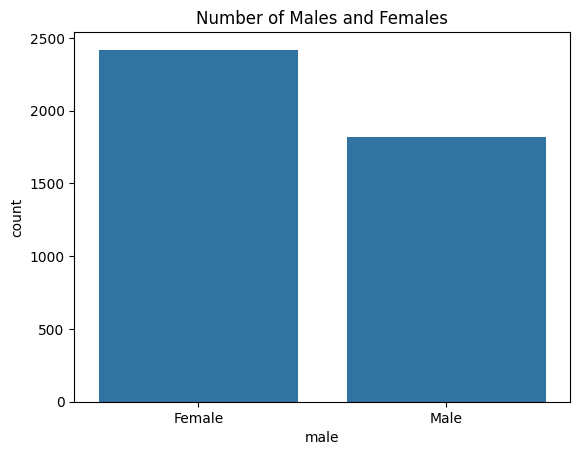

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='male', data=data)
plt.title('Number of Males and Females')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

#### Realice un ggrafico de Barras de TenYearCHD

*   Elemento de lista
*   Elemento de lista



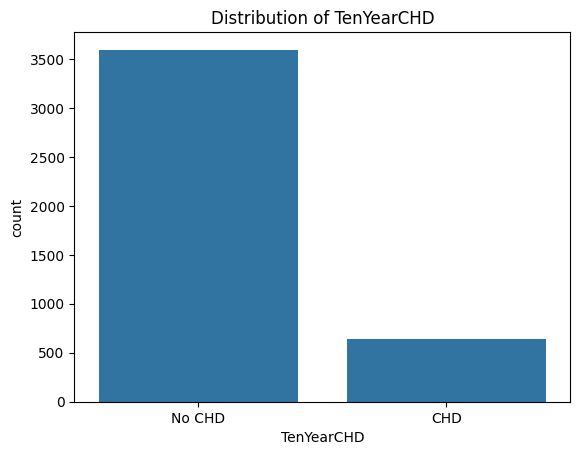

In [8]:
sns.countplot(x='TenYearCHD', data=data)
plt.title('Distribution of TenYearCHD')
plt.xticks([0, 1], ['No CHD', 'CHD'])
plt.show()

#### Realice un grafico de densidad del BMI

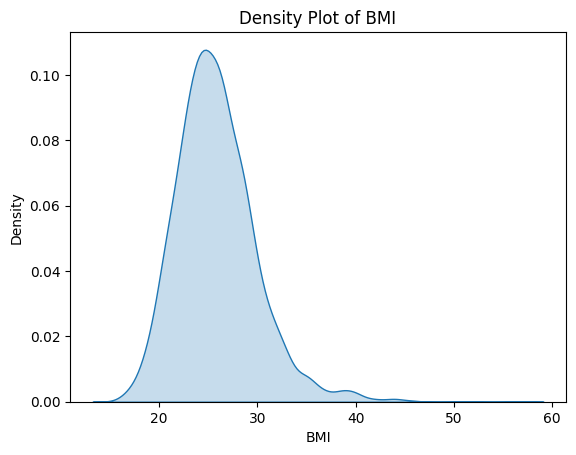

In [9]:
sns.kdeplot(data=data, x='BMI', fill=True)
plt.title('Density Plot of BMI')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()

#### Realice un grafico de densidad del BMI que diferencie entre hombres y mujeres, ¿Cual tiene en promedio mayor BMI?

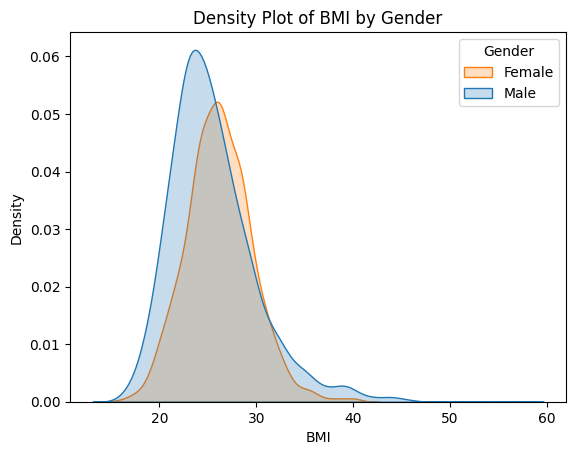

In [10]:
sns.kdeplot(data=data, x='BMI', hue='male', fill=True)
plt.title('Density Plot of BMI by Gender')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

#### Realice un mapa de calor entre las variables (heatmap) y diga cual es el par de variables más correlacionadas. Recuerde que para sacar la correlacion puede usar data.corr()

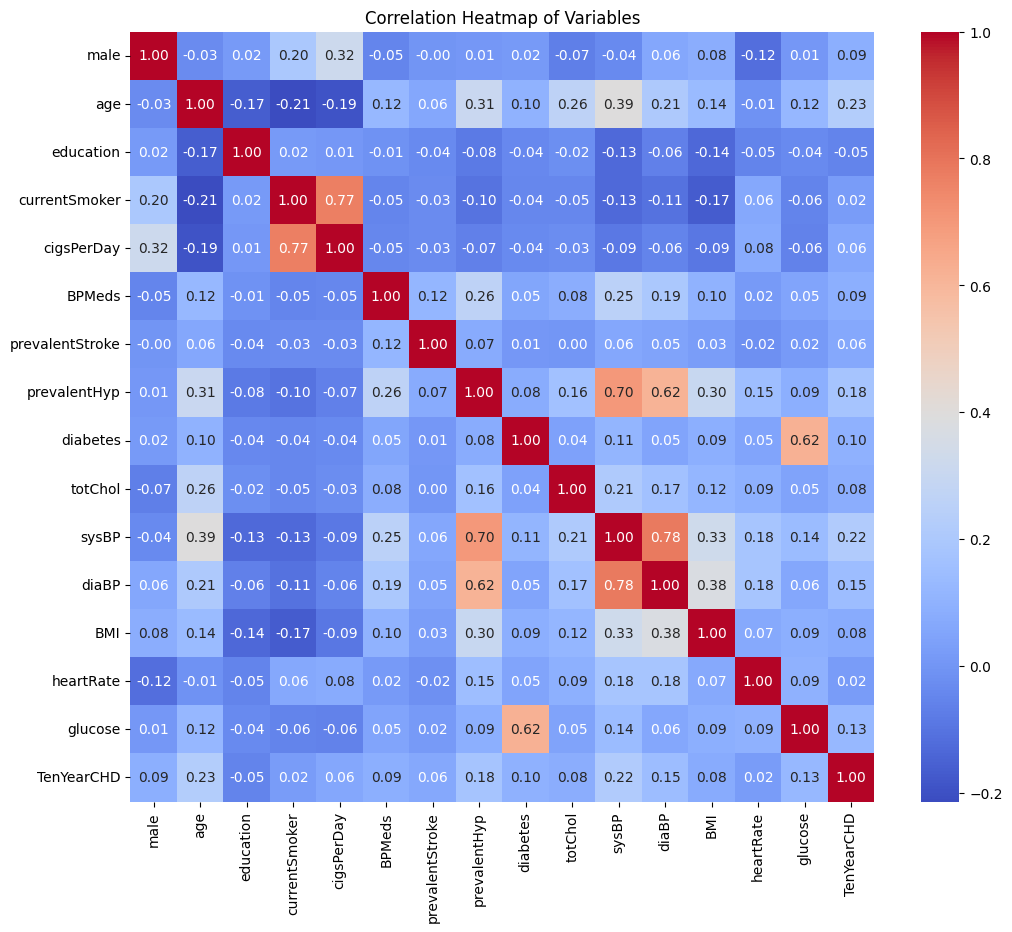


The pair of variables with the highest correlation is:
sysBP  diaBP    0.784002
dtype: float64


In [11]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Variables')
plt.show()

# Find the most correlated pair
# Exclude self-correlations (diagonal) and duplicate pairs
corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
# Get the highest correlation, excluding self-correlation
most_correlated = sorted_pairs[sorted_pairs != 1].drop_duplicates().tail(1)

print("\nThe pair of variables with the highest correlation is:")
print(most_correlated)

¿Haga un boxplot por genero para cada una de estas tres variables :BMI,	heartRate y	glucose.¿hay outliers ?

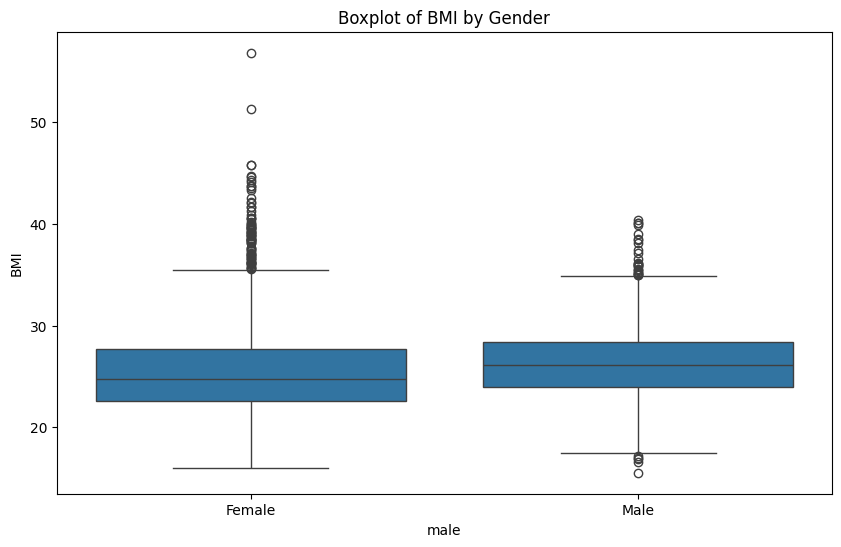

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='male', y='BMI', data=data)
plt.title('Boxplot of BMI by Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.ylabel('BMI')
plt.show()

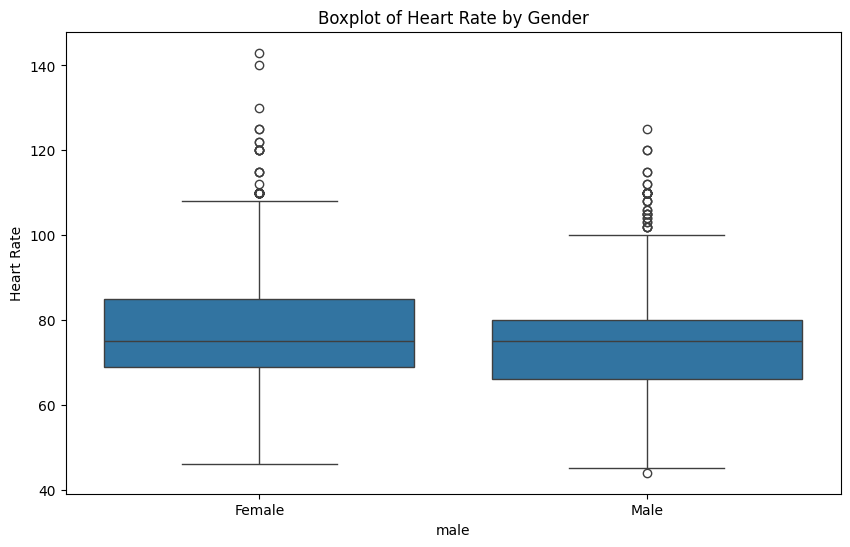

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='male', y='heartRate', data=data)
plt.title('Boxplot of Heart Rate by Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.ylabel('Heart Rate')
plt.show()

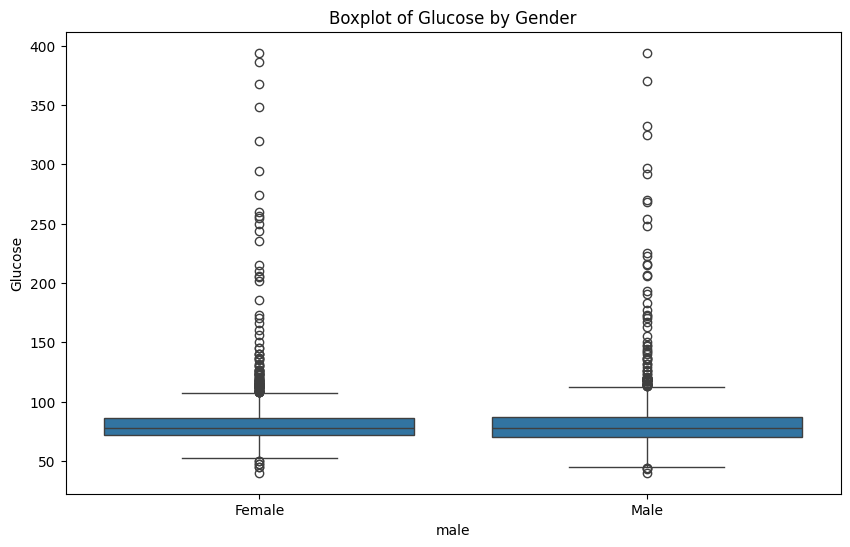

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='male', y='glucose', data=data)
plt.title('Boxplot of Glucose by Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.ylabel('Glucose')
plt.show()

### Manipulación de Datos

#### De cada variable cuente cuantos datos nulos hay

In [15]:
null_counts = data.isnull().sum()
print("Number of null values per variable:")
print(null_counts)

Number of null values per variable:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


#### Utilice dropna para borrar los datos faltantes ¿cuantos datos quedan ?

In [16]:
data_cleaned = data.dropna()
print(f"Number of data points after removing missing values: {data_cleaned.shape[0]}")

Number of data points after removing missing values: 3656


#### Seleccione sus variables X y su variable y

In [18]:
X = data_cleaned.drop('TenYearCHD', axis=1)
y = data_cleaned['TenYearCHD']

#### Divida aleatoriamente la tabla en test y train, dejando el 30% de los datos para test y usando un random state de 123.
1. ¿De que tamaño queda cada dataset?

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [21]:
print(f"Size of X_train: {X_train.shape}")
print(f"Size of X_test: {X_test.shape}")
print(f"Size of y_train: {y_train.shape}")
print(f"Size of y_test: {y_test.shape}")

Size of X_train: (2559, 15)
Size of X_test: (1097, 15)
Size of y_train: (2559,)
Size of y_test: (1097,)


#### Entrene el modelo de Regresion logistica usando datos de entrenamiento

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Imprima los coeficientes y diga cual tiene un efecto mayor sobre desarrollar una enfermedad cardiaca

In [24]:
coefficients = pd.DataFrame({'variable': X_train.columns, 'coefficient': model.coef_[0]})
print("Model Coefficients:")
print(coefficients)

# Find the variable with the largest absolute coefficient
most_influential_variable = coefficients.loc[abs(coefficients['coefficient']).idxmax()]

print(f"\nThe variable with the largest effect on developing heart disease is '{most_influential_variable['variable']}' with a coefficient of {most_influential_variable['coefficient']:.4f}.")

Model Coefficients:
           variable  coefficient
0              male     0.111469
1               age     0.027397
2         education    -0.341065
3     currentSmoker    -0.060866
4        cigsPerDay     0.024553
5            BPMeds     0.031085
6   prevalentStroke     0.023856
7      prevalentHyp     0.219384
8          diabetes     0.042325
9           totChol    -0.001175
10            sysBP     0.018894
11            diaBP    -0.021620
12              BMI    -0.047800
13        heartRate    -0.030870
14          glucose     0.004413

The variable with the largest effect on developing heart disease is 'education' with a coefficient of -0.3411.


#### Usando los datos de test calcule la matriz de confusión, el accuracy, el recall, la precision y el f1-score.

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")

Confusion Matrix:
[[917   1]
 [173   6]]

Accuracy: 0.8414
Recall: 0.0335
Precision: 0.8571
F1-score: 0.0645


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Pinte la curva ROC, y saque el valor, busque en internet como interpretarla e interprete

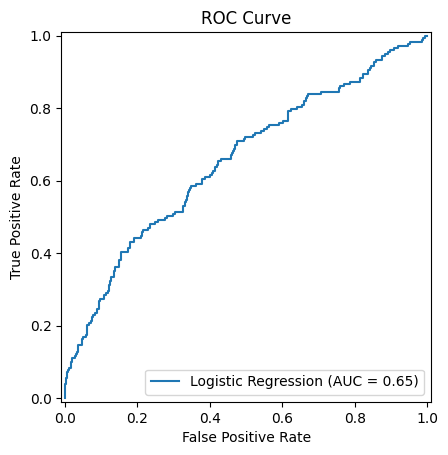

AUC: 0.6538


In [26]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Get the predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()
plt.title('ROC Curve')
plt.show()

print(f"AUC: {roc_auc:.4f}")